## Modeling XGBoost and SVC



On this jupyter notebook we're gonna modeling and XGBoost Model and an Support Vector Classifier for IBM HR Dataset available on Colab.
This project was made for No Country Simulation

In [ ]:
""" Libraries
"""


import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection \
        import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report



In [ ]:
clean_dt = pd.read_csv(
    "/content/data_despues_de_preprocesamiento.csv",
    index_col="Unnamed: 0"
)
clean_dt['Attrition'] = clean_dt['Attrition'].replace({"Yes":1, "No":0})
clean_dt.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeNumber,1,2,4,5,7
EnvironmentSatisfaction,2,3,4,4,1


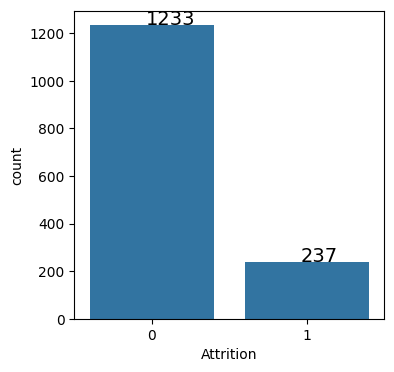

In [ ]:
plt.figure(figsize=(4,4))
sb.countplot(x=clean_dt['Attrition'])
target_count = clean_dt.Attrition.value_counts()
plt.annotate(text=str(target_count[0]), xy=(-0.04,3+target_count[0]), size=14)
plt.annotate(text=str(target_count[1]), xy=(0.96,3+target_count[1]), size=14)
plt.show()

In [ ]:
data_attributes, data_target = clean_dt.drop(columns = "Attrition"), clean_dt["Attrition"]

In [ ]:
data_attributes.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [ ]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data_attributes)
categorical_columns = categorical_columns_selector(data_attributes)

In [ ]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(
    [
        ("one_hot_encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns)
    ]
)

In [ ]:
data_attributes_train, data_attributes_test, data_target_train, data_target_test \
    = train_test_split(
        data_attributes, data_target, random_state=42, train_size=.7
     )

# XGB

In [ ]:
xgb_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            XGBClassifier(),
        ),
    ]
)
xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'Ho...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
parameter_grid = {
    "classifier__max_depth": range(1, 5, 1),
    "classifier__n_estimators": range(60, 200, 40),
    "classifier__learning_rate": [0.1, 0.01, 0.05]
}

In [ ]:
%%time
xgb_cv = GridSearchCV(
    xgb_model,
    param_grid=parameter_grid,
    cv= 5,
    scoring = ['accuracy', 'f1','recall', 'precision'],
    refit='accuracy'
)
xgb_cv.fit(data_attributes_train, data_target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

CPU times: user 42.6 s, sys: 505 ms, total: 43.1 s
Wall time: 26.3 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'EducationField',
                                                                          'Gender',
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'OverTime']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EmployeeNumber',
                                                                          '...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01, 0.05],
                         'classifier__max_depth': range(1, 5),
                         'classifier__n_estimators': range(60, 200, 40)},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [ ]:
xgb_cv.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 1,
 'classifier__n_estimators': 180}

In [ ]:
xgb_cv.cv_results_

{'mean_fit_time': array([0.04203496, 0.04285116, 0.05518456, 0.0586298 , 0.04208026,
        0.05401735, 0.36149106, 0.14077449, 0.0539578 , 0.06942749,
        0.09058256, 0.10813508, 0.06501842, 0.09269142, 0.12718887,
        0.1462863 , 0.03495598, 0.04268322, 0.05110869, 0.06243377,
        0.04192815, 0.05369945, 0.07261662, 0.08325624, 0.05631957,
        0.07694454, 0.09938273, 0.11434011, 0.43160377, 0.10005541,
        0.13502893, 0.16419859, 0.03493443, 0.04410748, 0.05588441,
        0.05958815, 0.04029832, 0.05543995, 0.06547651, 0.08110251,
        0.05314608, 0.07246675, 0.0952548 , 0.10872426, 0.07086735,
        0.0926672 , 0.12677336, 0.15479522]),
 'std_fit_time': array([0.01443573, 0.00147502, 0.00393559, 0.00188707, 0.00330947,
        0.00198393, 0.49229948, 0.11886301, 0.00892421, 0.00133955,
        0.00446219, 0.00233203, 0.00329906, 0.00270897, 0.0086519 ,
        0.00865266, 0.0017343 , 0.00313838, 0.0030738 , 0.00335836,
        0.00259138, 0.00135061, 0.007

In [ ]:
def get_metrics_validation(model, scoring):
    scores = []
    for score in scoring:
        idx = np.where(model.cv_results_['rank_test_'+score] == 1)
        scores = scores + \
        [
            {
                ('best_test_'+score):
                model.cv_results_['mean_test_'+score][idx].max()
            },
            {
                ('best_test_'+score+'_std'):
                model.cv_results_['std_test_'+score][idx].max()
            }
        ]
    return scores

In [ ]:
def get_accuracy_top_5_validation(model):
    scores = []
    for i in range(5):
        idx = np.where(model.cv_results_['rank_test_accuracy'] == (i + 1))
        if not idx[0].size: continue
        idx = idx[0][0]
        scores = scores + \
        [
            {
                ('test_accuracy_on_#'+str(i + 1)):
                model.cv_results_['mean_test_accuracy'][idx]
            },
            {
                'params':model.cv_results_['params'][idx]
            }
        ]
    return scores

In [ ]:
def get_metrics_test(report):
  accuracy = report['accuracy']

  # micro_f1 =  report['micro avg']['f1-score']
  macro_f1 = report['macro avg']['f1-score']
  weighted_f1 = report['weighted avg']['f1-score']

  # micro_precision =  report['micro avg']['precision']
  macro_precision = report['macro avg']['precision']
  weighted_precision = report['weighted avg']['precision']

  # micro_recall =  report['micro avg']['recall']
  macro_recall = report['macro avg']['recall']
  weighted_recall = report['weighted avg']['recall']

  return [{'best_test_accuracy':accuracy,
          #  'best_test_f1_micro':micro_f1,
           'best_test_f1_macro':macro_f1,
           'best_test_f1_weighted':weighted_f1,
          #  'best_test_precision_micro':micro_precision,
           'best_test_precision_macro':macro_precision,
           'best_test_precision_weighted':weighted_precision,
          #  'best_test_recall_micro':micro_recall,
           'best_test_recall_macro':macro_recall,
           'best_test_recall_weighted':weighted_recall,
           }]

In [ ]:
xgb_scores_validation = get_metrics_validation(
    xgb_cv, ['accuracy','f1','precision','recall']
)
xgb_scores_validation

[{'best_test_accuracy': 0.8658868103244138},
 {'best_test_accuracy_std': 0.01461547102624314},
 {'best_test_f1': 0.44370755949703317},
 {'best_test_f1_std': 0.08533605932115665},
 {'best_test_precision': 0.8387878787878789},
 {'best_test_precision_std': 0.09608519159831681},
 {'best_test_recall': 0.3295238095238095},
 {'best_test_recall_std': 0.05572852890791541}]

In [ ]:
xgb_top_scores_validation = get_accuracy_top_5_validation(
    xgb_cv
)
xgb_top_scores_validation

[{'test_accuracy_on_#1': 0.8658868103244138},
 {'params': {'classifier__learning_rate': 0.1,
   'classifier__max_depth': 1,
   'classifier__n_estimators': 180}},
 {'test_accuracy_on_#2': 0.8629789249348805},
 {'params': {'classifier__learning_rate': 0.05,
   'classifier__max_depth': 2,
   'classifier__n_estimators': 180}},
 {'test_accuracy_on_#3': 0.862964717025811},
 {'params': {'classifier__learning_rate': 0.1,
   'classifier__max_depth': 2,
   'classifier__n_estimators': 140}},
 {'test_accuracy_on_#5': 0.8620080511484727},
 {'params': {'classifier__learning_rate': 0.1,
   'classifier__max_depth': 2,
   'classifier__n_estimators': 60}}]

In [ ]:
y_pred_xgb = xgb_cv.best_estimator_.predict(data_attributes_test)
report_xgb = classification_report(
    data_target_test, y_pred_xgb, output_dict=False
)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.64      0.15      0.24        61

    accuracy                           0.87       441
   macro avg       0.76      0.57      0.58       441
weighted avg       0.85      0.87      0.83       441



In [ ]:
y_pred_xgb = xgb_cv.best_estimator_.predict(data_attributes_test)
report_xgb = classification_report(
    data_target_test, y_pred_xgb, output_dict=True
)
xgb_scores = get_metrics_test(report_xgb)
xgb_scores

[{'best_test_accuracy': 0.8707482993197279,
  'best_test_f1_macro': 0.5846840148698884,
  'best_test_f1_weighted': 0.8340132682564971,
  'best_test_precision_macro': 0.7605386416861827,
  'best_test_precision_weighted': 0.8456642610205675,
  'best_test_recall_macro': 0.5671915444348576,
  'best_test_recall_weighted': 0.8707482993197279}]

In [ ]:
xgb_results = pd.DataFrame(xgb_scores).sort_values(
    "best_test_accuracy", ascending=False
)
xgb_results.head().T

,0
best_test_accuracy,0.870748
best_test_f1_macro,0.584684
best_test_f1_weighted,0.834013
best_test_precision_macro,0.760539
best_test_precision_weighted,0.845664
best_test_recall_macro,0.567192
best_test_recall_weighted,0.870748


# SVC

In [ ]:
svc_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            SVC(probability=True),
        ),
    ]
)
svc_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'Ho...
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('classifier', SVC(probability=True))])

In [ ]:
parameter_grid = {
    'classifier__C':[1,10,100],
    'classifier__gamma':[1,0.1,0.01,0.001],
    'classifier__kernel':['linear','rbf']
}

In [ ]:
%%time
svc_cv = GridSearchCV(
    svc_model,
    param_grid=parameter_grid,
    cv= 5,
    scoring = ['accuracy', 'f1','recall', 'precision'],
    refit='accuracy'
)
svc_cv.fit(data_attributes_train, data_target_train)

In [ ]:
svc_cv.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

In [ ]:
svc_scores_validation = get_metrics_validation(
    svc_cv, ['accuracy','f1','precision','recall']
)
svc_scores_validation

[{'best_test_accuracy': 0.8775420317309969},
 {'best_test_accuracy_std': 0.016995564201932028},
 {'best_test_f1': 0.5492372731751916},
 {'best_test_f1_std': 0.0785061076272602},
 {'best_test_precision': 0.8},
 {'best_test_precision_std': 0.4},
 {'best_test_recall': 0.45396825396825397},
 {'best_test_recall_std': 0.08261291012990049}]

In [ ]:
svc_top_scores_validation = get_accuracy_top_5_validation(
    svc_cv
)
svc_top_scores_validation

[{'test_accuracy_on_#1': 0.8775420317309969},
 {'params': {'classifier__C': 100,
   'classifier__gamma': 0.001,
   'classifier__kernel': 'rbf'}},
 {'test_accuracy_on_#2': 0.8755955481884916},
 {'params': {'classifier__C': 1,
   'classifier__gamma': 1,
   'classifier__kernel': 'linear'}}]

In [ ]:
y_pred_svc = svc_cv.best_estimator_.predict(data_attributes_test)
report_svc = classification_report(
    data_target_test, y_pred_svc, output_dict=True
)
svc_scores = get_metrics_test(report_svc)
svc_scores

[{'best_test_accuracy': 0.8956916099773242,
  'best_test_f1_macro': 0.7208860759493672,
  'best_test_f1_weighted': 0.8806653463072993,
  'best_test_precision_macro': 0.8246262785208498,
  'best_test_precision_weighted': 0.8844411617256397,
  'best_test_recall_macro': 0.6779982743744608,
  'best_test_recall_weighted': 0.8956916099773242}]

In [ ]:
svc_results = pd.DataFrame(svc_scores).sort_values(
    "best_test_accuracy", ascending=False
)
svc_results.head().T

,0
best_test_accuracy,0.895692
best_test_f1_macro,0.720886
best_test_f1_weighted,0.880665
best_test_precision_macro,0.824626
best_test_precision_weighted,0.884441
best_test_recall_macro,0.677998
best_test_recall_weighted,0.895692


# Trying SMOTE and RUS

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from collections import Counter
from sklearn.model_selection import StratifiedKFold

In [ ]:
# ros = RandomOverSampler(sampling_strategy='minority')
rus = RandomUnderSampler(sampling_strategy=0.5)
smote = SMOTE(sampling_strategy=0.7)
skf = StratifiedKFold(n_splits=10)
nm = NearMiss(version=1,sampling_strategy=0.5)

# XGB

In [ ]:
parameter_grid = {
    "classifier__max_depth": range(1, 5, 1),
    "classifier__n_estimators": range(60, 200, 40),
    "classifier__learning_rate": [0.1, 0.01, 0.05]
}

In [ ]:
xgb_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("undersampling", nm),
        ("oversampling", smote),
        (
            "classifier",
            XGBClassifier(),
        ),
    ]
)
xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'Ho...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
%%time
xgb_cv = GridSearchCV(
    xgb_model,
    param_grid = parameter_grid,
    cv = 10,
    scoring = ['accuracy', 'f1','recall', 'precision'],
    refit = 'f1'
)
xgb_cv.fit(data_attributes_train, data_target_train)

CPU times: user 1min 48s, sys: 1.07 s, total: 1min 49s
Wall time: 1min 6s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'EducationField',
                                                                          'Gender',
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'OverTime']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EmployeeNumber',...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01, 0.05],
                         'classifier__max_depth': range(1, 5),
                         'classifier__n_estimators': range(60, 200, 40)},
             refit='f1', scoring=['accuracy', 'f1', 'recall', 'precision'])

In [ ]:
xgb_cv.best_params_

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 1,
 'classifier__n_estimators': 140}

In [ ]:
xgb_scores_validation = get_metrics_validation(
    xgb_cv, ['accuracy','f1','precision','recall']
)
xgb_scores_validation

[{'best_test_accuracy': 0.8250713877784124},
 {'best_test_accuracy_std': 0.03070602704542732},
 {'best_test_f1': 0.4542234156925217},
 {'best_test_f1_std': 0.07738706537900897},
 {'best_test_precision': 0.4933506844033159},
 {'best_test_precision_std': 0.14389565289321893},
 {'best_test_recall': 0.5800653594771241},
 {'best_test_recall_std': 0.08433968795186128}]

In [ ]:
y_pred_xgb = xgb_cv.best_estimator_.predict(data_attributes_test)
report_xgb = classification_report(
    data_target_test, y_pred_xgb, output_dict=False
)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       380
           1       0.33      0.43      0.37        61

    accuracy                           0.80       441
   macro avg       0.62      0.64      0.63       441
weighted avg       0.82      0.80      0.81       441



In [ ]:
y_pred_xgb = xgb_cv.best_estimator_.predict(data_attributes_test)
report_xgb = classification_report(
    data_target_test, y_pred_xgb, output_dict=True
)
xgb_scores = get_metrics_test(report_xgb)
xgb_scores

[{'best_test_accuracy': 0.8027210884353742,
  'best_test_f1_macro': 0.6285039263340337,
  'best_test_f1_weighted': 0.8125280147788272,
  'best_test_precision_macro': 0.6184573002754821,
  'best_test_precision_weighted': 0.8247034350930456,
  'best_test_recall_macro': 0.6446937014667817,
  'best_test_recall_weighted': 0.8027210884353742}]

In [ ]:
xgb_results = pd.DataFrame(xgb_scores).sort_values(
    "best_test_accuracy", ascending=False
)
xgb_results.head().T

,0
best_test_accuracy,0.884354
best_test_f1_macro,0.687543
best_test_f1_weighted,0.866922
best_test_precision_macro,0.783455
best_test_precision_weighted,0.867935
best_test_recall_macro,0.650777
best_test_recall_weighted,0.884354


# SVC

In [ ]:
svc_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("oversampling", smote),
        (
            "classifier",
            SVC(probability=True),
        ),
    ]
)
svc_model

In [ ]:
parameter_grid = {
    'classifier__C':[1,10,100],
    'classifier__gamma':[1,0.1,0.01,0.001],
    'classifier__kernel':['linear','rbf']
}

In [ ]:
%%time
svc_cv = GridSearchCV(
    svc_model,
    param_grid=parameter_grid,
    cv= 5,
    scoring = ['accuracy', 'f1','recall', 'precision'],
    refit='accuracy'
)
svc_cv.fit(data_attributes_train, data_target_train)

In [ ]:
svc_cv.best_params_

In [ ]:
svc_scores_validation = get_metrics_validation(
    svc_cv, ['accuracy','f1','precision','recall']
)
svc_scores_validation

In [ ]:
y_pred_svc = svc_cv.best_estimator_.predict(data_attributes_test)
report_svc = classification_report(
    data_target_test, y_pred_svc, output_dict=True
)
svc_scores = get_metrics_test(report_svc)
svc_scores